In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_excel('electricity_generation_cleaned.xlsx')
df.head()

,Entity,Year,Electricity generation - TWh,Unnamed: 3,Year.1
0,ASEAN (Ember),2000,378.61,NaN,2000-01-01
1,ASEAN (Ember),2001,404.85,NaN,2001-01-01
2,ASEAN (Ember),2002,433.19,NaN,2002-01-01
3,ASEAN (Ember),2003,458.24,NaN,2003-01-01
4,ASEAN (Ember),2004,496.56,NaN,2004-01-01


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7630 entries, 0 to 7629
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Entity                        7630 non-null   object        
 1   Year                          7630 non-null   int64         
 2   Electricity generation - TWh  7630 non-null   float64       
 3   Unnamed: 3                    0 non-null      float64       
 4   Year.1                        7630 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 298.2+ KB


In [17]:
df1 = df.copy()
df1.columns.tolist()

['Entity', 'Year', 'Electricity generation - TWh', 'Unnamed: 3', 'Year.1']

In [34]:
df1 = df1[['Entity','Electricity generation - TWh','Year.1']]
df1.rename(columns={'Year.1':'Year','Electricity generation - TWh':'elec_prod' }, inplace=True)
df1.head()

,Entity,elec_prod,Year
0,ASEAN (Ember),378.61,2000-01-01
1,ASEAN (Ember),404.85,2001-01-01
2,ASEAN (Ember),433.19,2002-01-01
3,ASEAN (Ember),458.24,2003-01-01
4,ASEAN (Ember),496.56,2004-01-01


In [35]:
df1.describe()

,elec_prod,Year
count,7630.000000,7630
mean,621.724432,2007-08-28 18:18:24.062909440
min,0.000000,1985-01-01 00:00:00
25%,2.300000,2001-01-01 00:00:00
50%,20.973500,2009-01-01 00:00:00
75%,100.517500,2016-01-01 00:00:00
max,30853.340000,2024-01-01 00:00:00
std,2444.905778,NaN


## ANALYSE UNIVARIEE

L'analyse univariée va principalement se porter sur la production energetique 

In [37]:
df1['elec_prod'].describe()

count     7630.000000
mean       621.724432
std       2444.905778
min          0.000000
25%          2.300000
50%         20.973500
75%        100.517500
max      30853.340000
Name: elec_prod, dtype: float64

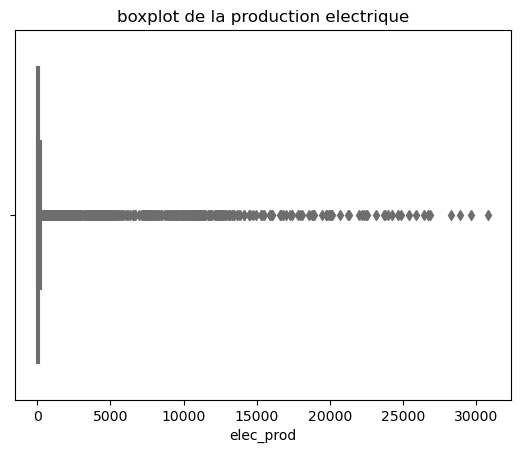

In [40]:
sns.boxplot(x= df1['elec_prod'], color='lightcoral')
plt.title('boxplot de la production electrique')
plt.show()


In [42]:
# écart interquartile, skewness, kurtosis
q1 = df1['elec_prod'].quantile(0.25)
q3 = df1['elec_prod'].quantile(0.75)
iqr = q3 - q1
skew = df1['elec_prod'].skew()
kurt = df1['elec_prod'].kurtosis()
iqr, skew, kurt

(98.2175, 6.169777429236993, 45.72042547347937)

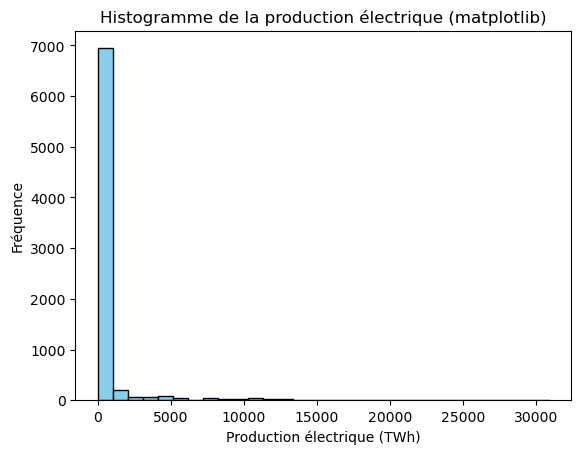

In [43]:
plt.hist(df1['elec_prod'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogramme de la production électrique (matplotlib)')
plt.xlabel('Production électrique (TWh)')
plt.ylabel('Fréquence')
plt.show()

In [47]:
# countries that have electricity production equal to zero
zero_prod_countries = df1[df1['elec_prod'] == 0]['Entity'].unique()
zero_prod_countries

df2 = df1.copy()
# delete rows with zero electricity production
df2 = df2[df2['elec_prod'] != 0]
df2.head()

,Entity,elec_prod,Year
0,ASEAN (Ember),378.61,2000-01-01
1,ASEAN (Ember),404.85,2001-01-01
2,ASEAN (Ember),433.19,2002-01-01
3,ASEAN (Ember),458.24,2003-01-01
4,ASEAN (Ember),496.56,2004-01-01


In [48]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7607 entries, 0 to 7629
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Entity     7607 non-null   object        
 1   elec_prod  7607 non-null   float64       
 2   Year       7607 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 237.7+ KB


In [50]:
df2.describe()

,elec_prod,Year
count,7607.000000,7607
mean,623.604235,2007-08-25 01:40:42.434599936
min,0.010000,1985-01-01 00:00:00
25%,2.425000,2001-01-01 00:00:00
50%,21.260000,2009-01-01 00:00:00
75%,101.630000,2016-01-01 00:00:00
max,30853.340000,2024-01-01 00:00:00
std,2448.360183,NaN


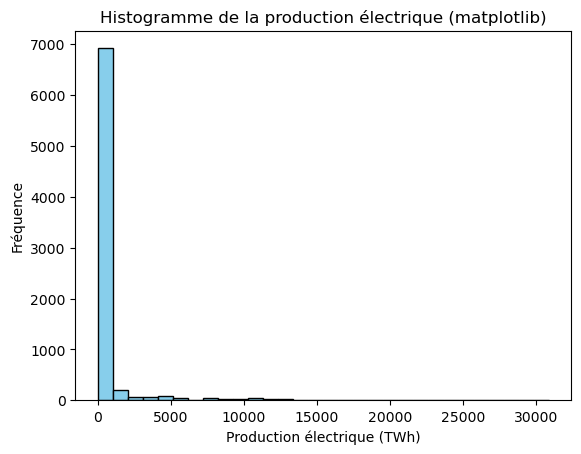

In [52]:
plt.hist(df2['elec_prod'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogramme de la production électrique (matplotlib)')
plt.xlabel('Production électrique (TWh)')
plt.ylabel('Fréquence')
plt.show()

In [54]:
df2[df2['elec_prod']<=500]

,Entity,elec_prod,Year
0,ASEAN (Ember),378.61,2000-01-01
1,ASEAN (Ember),404.85,2001-01-01
2,ASEAN (Ember),433.19,2002-01-01
3,ASEAN (Ember),458.24,2003-01-01
4,ASEAN (Ember),496.56,2004-01-01
...,...,...,...
7625,Zimbabwe,8.48,2019-01-01
7626,Zimbabwe,6.71,2020-01-01
7627,Zimbabwe,8.57,2021-01-01
7628,Zimbabwe,8.94,2022-01-01
